<a href="https://colab.research.google.com/github/OlegKret/---/blob/master/lab9_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

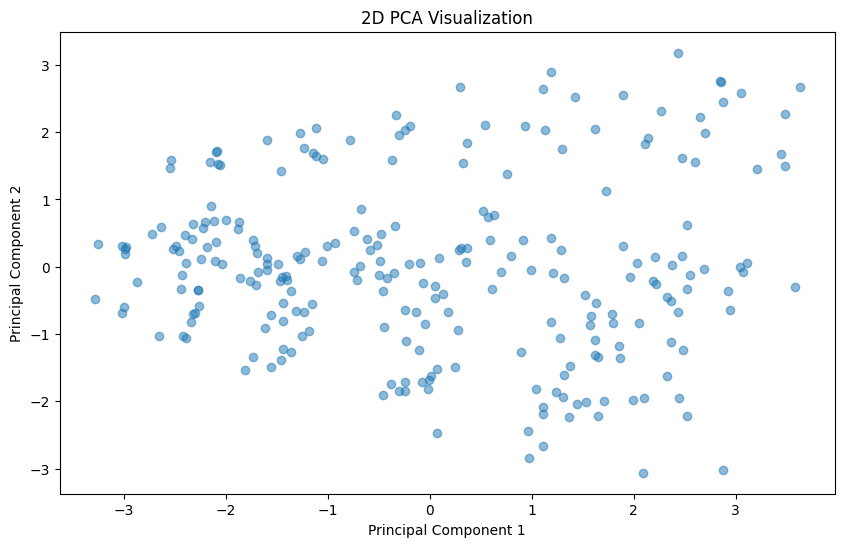

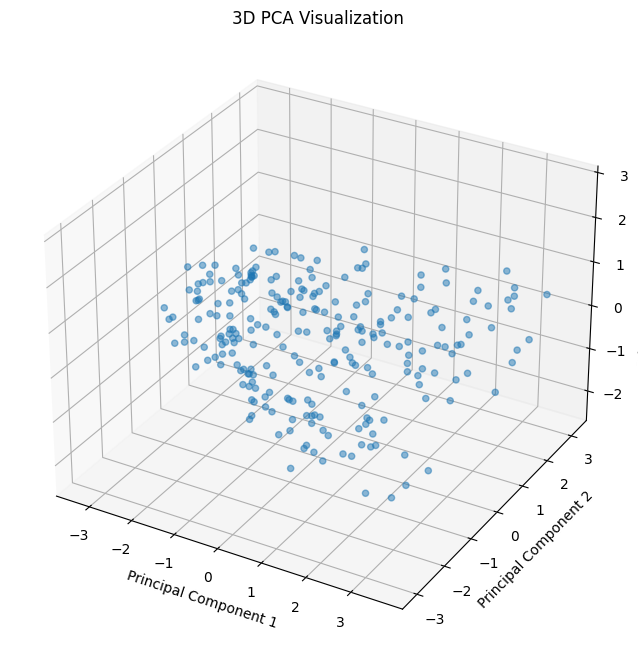

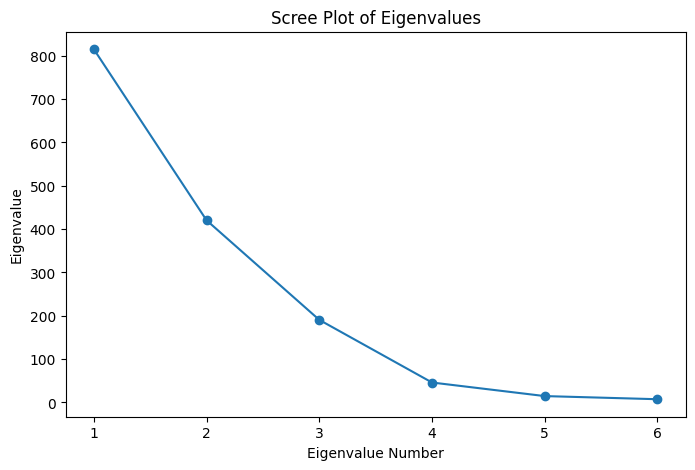

Smallest i satisfying the criterion: 2


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 1. Load and preprocess your dataset
data = pd.read_csv("/content/sample_data/buddymove_holidayiq.csv")  # Use pandas to read the CSV
data = data.select_dtypes(include=[np.number]) #Only keep numerical values, drop non-numerical

# Convert to numpy array
scaled_data = data.values

scaler = StandardScaler()
scaled_data = scaler.fit_transform(scaled_data)

# 2. PCA for Dimensionality Reduction and Visualization
pca = PCA(n_components=3)  # Reduce to 2 or 3 components for visualization
pca_result = pca.fit_transform(scaled_data)

# Visualize in 2D
plt.figure(figsize=(10, 6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA Visualization')
plt.show()

# If you chose 3 components, visualize in 3D
if pca.n_components == 3:
    from mpl_toolkits.mplot3d import Axes3D

    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2], alpha=0.5)
    ax.set_xlabel('Principal Component 1')
    ax.set_ylabel('Principal Component 2')
    ax.set_zlabel('Principal Component 3')
    plt.title('3D PCA Visualization')
    plt.show()

# 3. SVD Analysis
U, s, Vt = np.linalg.svd(scaled_data)
eigenvalues = s**2  # Singular values squared are eigenvalues

# Sort eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]

# Plot eigenvalues
plt.figure(figsize=(8, 5))
plt.plot(np.arange(1, len(eigenvalues) + 1), eigenvalues, marker='o')
plt.xlabel('Eigenvalue Number')
plt.ylabel('Eigenvalue')
plt.title('Scree Plot of Eigenvalues')
plt.show()

# 4. Determine Smallest 'i' Satisfying the Criterion
cumulative_variance_ratio = np.cumsum(eigenvalues) / np.sum(eigenvalues)
for i, ratio in enumerate(cumulative_variance_ratio):
    if ratio >= 0.8:
        print(f"Smallest i satisfying the criterion: {i+1}")  # Add 1 for indexing
        break